In [2]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b4/c2/f74e0deb26379aead0956a6ecf9acd4587debba0c7abe4bd8fe53fe04ec2/matplotlib-3.7.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/32/c8/aa9e87941002150b1a8e7087e48da1c76290268b9fdfa3034a98a5806198/contourpy-1.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/91/f1/2379b341206a6e7e12f9d7c406ea03f0e0386eafa7913a47d8cc931cacf4/fonttools-4.42.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/d2/55/7021ffcc8cb26a520bb051aa0a3d08daf200cde945e5863d5768161

In [3]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from utils.preprocessing import get_dataset_partitions_tf

2023-09-02 21:25:47.498176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print(f"TensorFlow version: {tf.__version__}")
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPUs Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.13.0
Num GPUs Available: 1
GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-09-02 21:25:51.867666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:51.909441: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:51.910145: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [5]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-02 21:25:51.933024: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:51.933760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:51.934260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:53.885317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:53.885800: I tensorflow/compile

True

# Loading data
We would like to load our images in the resoultion 256x256.
We also would like to load them in batches of 32. Loading 32 images then another 32 and so on.
## Constants

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3  # The RGB channels
EPOCHS = 50

The `image_dataset_from_directory` function will load all the images in the folder `data/` and its subfolders

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE    
)
dataset

Found 2152 files belonging to 3 classes.


2023-09-02 21:25:54.219712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:54.220223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:54.220581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:54.221118: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 21:25:54.221142: I tensorflow/core/co

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

When images are loaded they are automatically sorted in classes. The classes are the names of the subfolders where the were found.

In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

**The images were loaded in 68 datasets**

------------------

`dataset.take(1)` takes 1 batch from the dataset and returns a list of tuple of the images in a batch and the labels of those images.
> Since the argument of take is 1, there will be only one iteration

(32, 256, 256, 3)
[1 1 1 0 1 0 0 0 0 2 1 1 1 1 0 0 0 1 2 0 1 0 1 0 0 0 1 0 1 1 1 1]


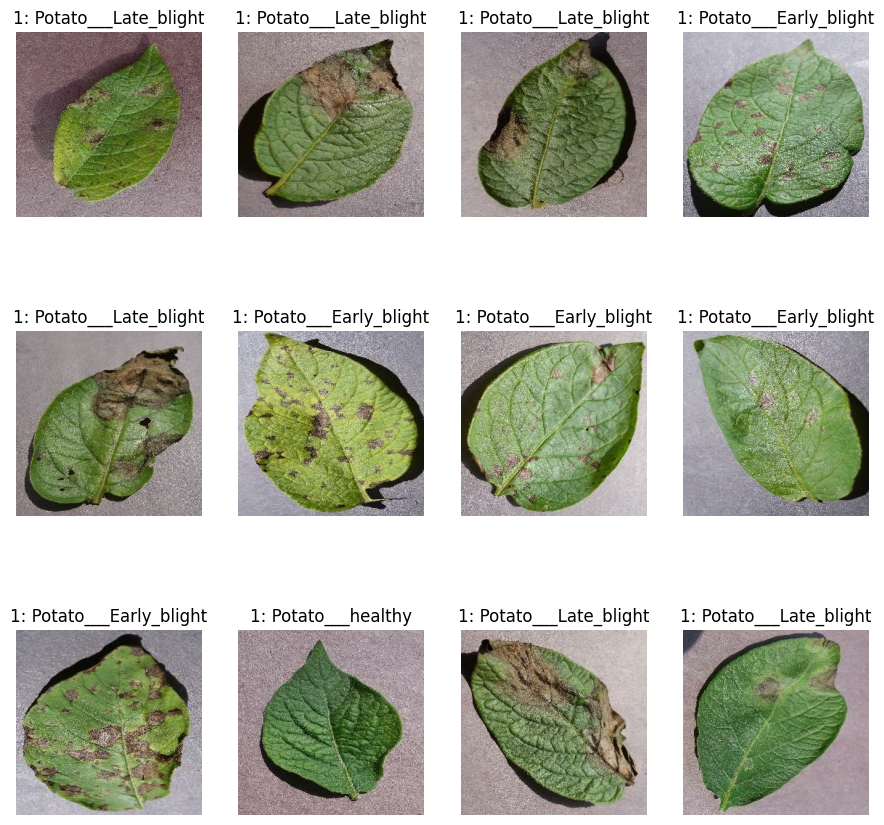

In [10]:
plt.figure(figsize=(11, 11))  # Let's resize the plot so that we can fit more pictures

for image_batch, label_batch in dataset.take(1): 
    print(image_batch.shape)
    print(label_batch.numpy())

    # Let's show the first 12 image in the batch
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)  # Choose the position where to plot in a grid of 3 lines and 4 columns
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # We need to convert to unisigned int of size 8 for it to plot properly
        plt.title("{}: {}".format(label_batch[0], class_names[label_batch[i]]))  # tile is "class number: class name"
        plt.axis("off")  # Remove the axes of the plot. They are not needed when showing an image

**(32, 256, 256, 3) : 32 is the size of the first batch. 256, 256 is the size of the images. 3 are the RGB channels**

# Split Data
We will split our data as follows:

* 70% training data
* 15% cross validation data
* 15% test data

After each epoch, we test our model in the cross validation set and improve it.

After `EPOCHS` number of epochs, we test our model against the test data set.

In [11]:
train_size = 0.7  # 70%
batches_in_training = int(train_size * len(dataset))  # How many batches will be in the training set
batches_in_training

47

In [12]:
# Get the training dataset
train_ds = dataset.take(batches_in_training)

In [13]:
# Get the rest of the batches that were not in the trainining dataset
tmp_test_ds = dataset.skip(batches_in_training)  

In [14]:
cv_size = 0.15  # 15%
batches_in_cv = int(cv_size * len(dataset))
batches_in_cv

10

In [15]:
cv_ds = tmp_test_ds.take(batches_in_cv)  # Training data set takes the number of batches `batches_in_cv`
test_ds = tmp_test_ds.skip(batches_in_cv)  # Test data set takes the rest of the batches

We could get the same result using the function `get_dataset_partition_tf` from the local `utils` package:

In [16]:
train_ds, cv_ds, test_ds = get_dataset_partitions_tf(dataset, train_split=0.7, cv_split=0.15)

In [17]:
len(train_ds)

47

In [18]:
len(cv_ds)

10

In [19]:
len(test_ds)

11

# Prefetch and Cache
Prefetching and caching are techniques used to speed up the training of the model.
They are better explained in the following video:ions



In [20]:
%%HTML
<div align="center">
    <iframe width="560" height="315" 
    src="https://www.youtube.com/embed/MLEKEplgCas?si=nGLgGDZUVV2Fbr3M">
    </iframe>
</div>

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
cv_ds = cv_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Preprocessing Layers
We'll create 2 small neural networs (we call layers) that will provide resize, rescaling and data augmentation.

## Resize & Rescale:

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Once the model is implemented in the wild, it won't necessarily be fed images of size 256x256
    layers.experimental.preprocessing.Rescaling(1.0/255),  # This layer is added to scale all the features to values between 0 and 1
])

## Data Augmentation
Data Augmentation is a technique used to grow the size of our dataset wihtout having to seek new data. It's well explained in this video:

In [23]:
%%HTML
<div align="center">
    <iframe width="560" height="315" 
    src="https://www.youtube.com/embed/mTVf7BN7S8w?si=ZnGl7BCc7PNhT5-a">
    </iframe>
</div>

Here is the layer (neural network) for data augmentation:

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),  # Flip randomly
    layers.experimental.preprocessing.RandomRotation(0.3)  # The factor of rotation (0.3 of a full rotation in either direction)
])

# Convolutional Network

Let's create our model including:
* The above 2 preprocessing layers
* A convolutional network
* A dense network
* An output layer

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = tf.keras.Sequential([
    # Preprocessing
    resize_and_rescale,
    data_augmentation,

    # Convolutional Network
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flattening the output of the convolutional network
    layers.Flatten(),

    # Dense neural network to make calculations
    layers.Dense(64, activation='relu'),

    # Output layer
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [27]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
# Train the model
# After each epoch, run the cross validation to improve its accuracy
t1 = time.time()
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=cv_ds
)
t2 = time.time()

Epoch 1/50


2023-09-02 21:26:03.461355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-02 21:26:06.370175: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d059290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-02 21:26:06.370233: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro M1200, Compute Capability 5.0
2023-09-02 21:26:06.448227: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-02 21:26:06.877577: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 [==============================] - 27s 257ms/step - loss: 0.9198 - accuracy: 0.4847 - val_loss: 0.9022 - val_accuracy: 0.4844
Epoch 2/50
47/47 [==============================] - 76s 2s/step - loss: 0.8067 - accuracy: 0.6117 - val_loss: 0.6093 - val_accuracy: 0.7156
Epoch 3/50
47/47 [==============================] - 108s 2s/step - loss: 0.4440 - accuracy: 0.8105 - val_loss: 0.3502 - val_accuracy: 0.8813
Epoch 4/50
47/47 [==============================] - 60s 1s/step - loss: 0.3411 - accuracy: 0.8544 - val_loss: 0.2456 - val_accuracy: 0.9156
Epoch 5/50
47/47 [==============================] - 32s 678ms/step - loss: 0.2317 - accuracy: 0.9089 - val_loss: 0.2709 - val_accuracy: 0.8938
Epoch 6/50
47/47 [==============================] - 27s 573ms/step - loss: 0.1824 - accuracy: 0.9282 - val_loss: 0.1641 - val_accuracy: 0.9250
Epoch 7/50
47/47 [==============================] - 27s 565ms/step - loss: 0.1871 - accuracy: 0.9348 - val_loss: 0.1485 - val_accuracy: 0.9469
Epoch 8/50
47/47 [

In [29]:
print("Training duration", t2 - t1)

Training duration 953.484400510788


### Let's test the model on the test dataset

In [30]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 3s 74ms/step - loss: 0.1034 - accuracy: 0.9602


In [31]:
scores

[0.10335271060466766, 0.9602272510528564]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Let's plot the accuracy on the training dataset and CV dataset after each epoch

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

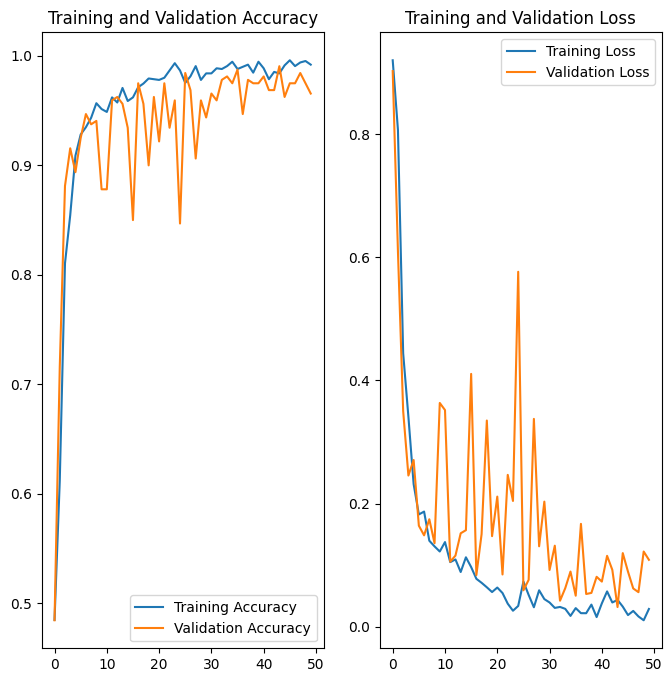

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Let's see how the model predicts one image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 467ms/step
Prediction Output: [5.6731564e-01 4.3268433e-01 6.6476416e-15]
predicted label: Potato___Early_blight


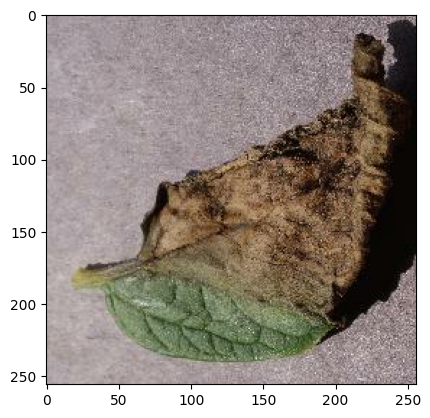

In [37]:
for images_batch, labels_batch in test_ds.take(1):  # This will iterate only once
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Prediction Output:", batch_prediction[0])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

## Inference function

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # output shape of img_array is [1, 256, 256, 3]
    # print(img_array.shape.as_list())  
    
    predictions = model.predict(img_array, verbose=0)  # Tensorflow has its way to transform it to [32, 256, 256, 3] to do its calculations

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [39]:
### Let's predict the classes 9 random images

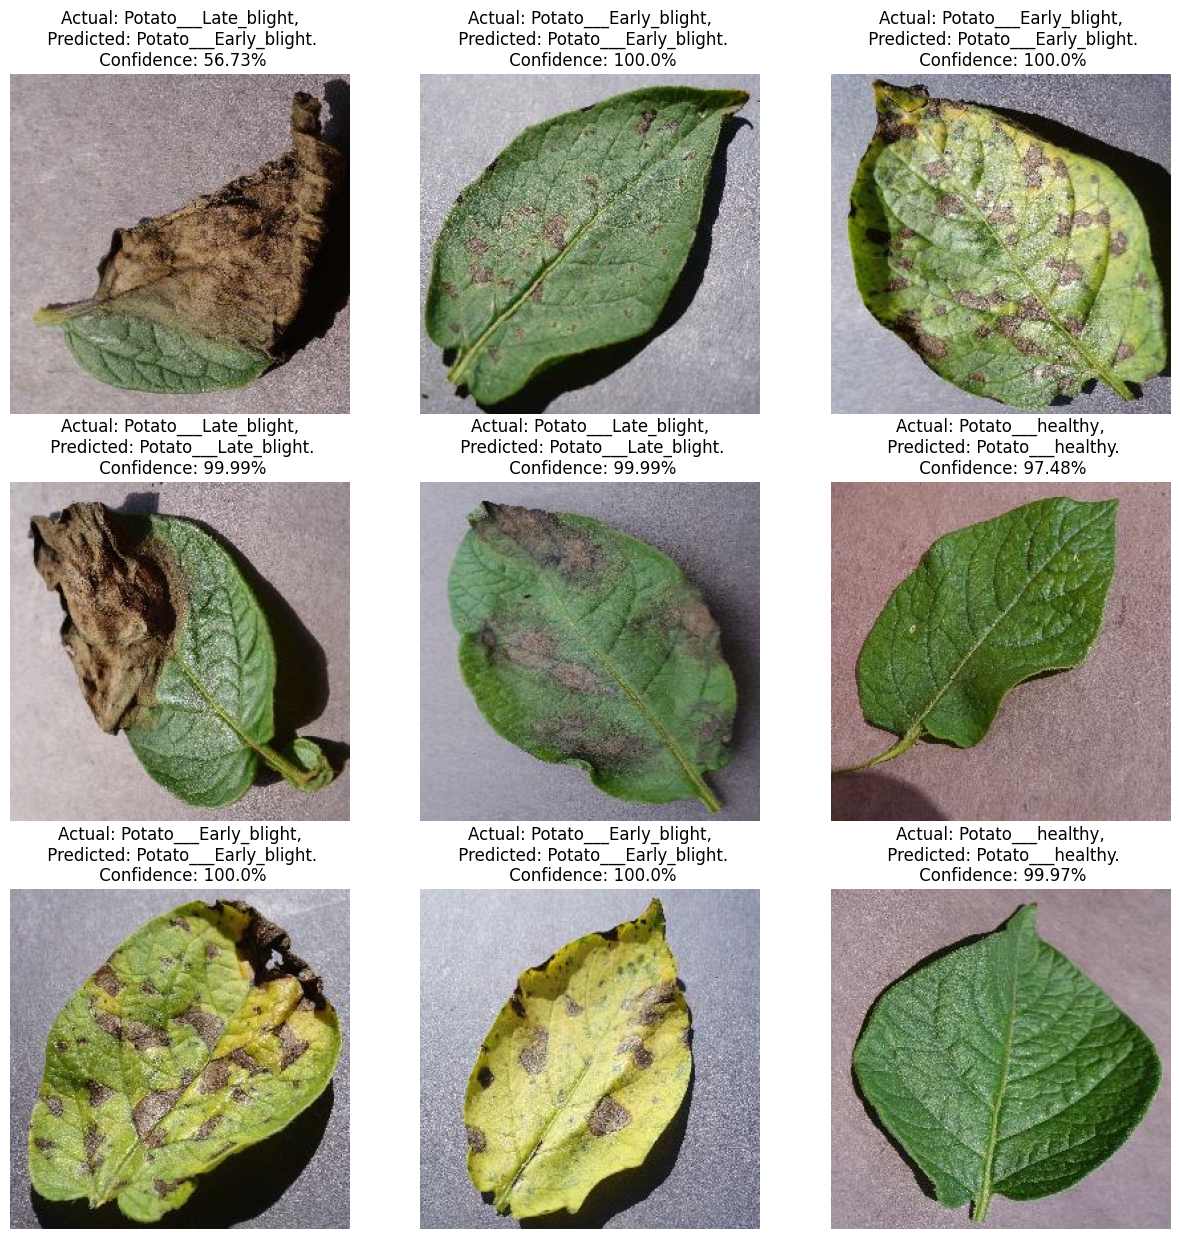

In [40]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Let's save the model

In [43]:
import os
# Increase the version of the model at each save.
# Each model will be in a subfolder of the folder `models`
model_version = max([int(i) for i in os.listdir("./models") + [0]]) + 1

# Save the mode
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1/assets


INFO:tensorflow:Assets written to: ./models/1/assets
